In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
df=pd.read_csv('netflix.csv')

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
#percentage of null values in each column
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [8]:
# number of movies and number of tv series
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

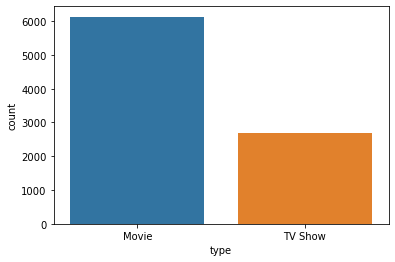

In [9]:
sns.countplot(x=df['type'],data=df)

## unnesting the dataset using split and stack for better understanding and drawing insight from the data


In [10]:
splitter1=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_cast=pd.DataFrame(splitter1,index=df['title']).stack()
df_cast=pd.DataFrame(df_cast.reset_index())
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']

In [11]:
splitter2=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_director=pd.DataFrame(splitter2,index=df['title']).stack()
df_director=pd.DataFrame(df_director.reset_index())
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [12]:
splitter3=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(splitter3,index=df['title']).stack()
df_country=pd.DataFrame(df_country).reset_index()
df_country=df_country[['title',0]]
df_country.columns=['title','country']

In [13]:
splitter4=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_genre=pd.DataFrame(splitter4,index=df['title']).stack()
df_genre=pd.DataFrame(df_genre).reset_index()
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']

## merging into the main dataframe

In [14]:
df_new1=df_cast.merge(df_director,on='title',how='inner')
df_new2=df_new1.merge(df_country,on='title',how='inner')
df_new=df_new2.merge(df_genre,on='title',how='inner')

## merging with the original data

In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
df_final=df_new.merge(df[['show_id','type','title','date_added','release_year','rating','duration','description']],
                      on='title',how='inner')
df_final.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


## replacing Nan values in the tables

In [17]:
df_final.isnull().sum()

title             0
cast              0
director          0
country           0
genre             0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [18]:
df_final['director'].replace(['nan'],['Unknown Director'],inplace=True)
df_final['cast'].replace('nan','Unknown Actor',inplace=True)
df_final['country'].replace(['nan'],[np.nan],inplace=True)

In [19]:
df_final.isna().sum()

title               0
cast                0
director            0
country         11897
genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
description         0
dtype: int64

## date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added when release year was 2013.So below piece of code just checks the mode of date added for release year=2013 and imputes in place of nulls the corresponding mode



In [20]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [21]:
for i in df_final[df_final['country'].isnull()]['director'].unique():
  if i in df_final[~df_final['country'].isnull()]['director'].unique():
    imp=df_final[df_final['director']==i]['country'].mode().values[0]
    df_final.loc[df_final['director']==i,'country']=df_final.loc[df_final['director']==i,'country'].fillna(imp)

In [22]:
for i in df_final[df_final['country'].isnull()]['cast'].unique():
  if i in df_final[~df_final['country'].isnull()]['cast'].unique():
    imp=df_final[df_final['cast']==i]['country'].mode().values[0]
    df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imp)
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)       
df_final.isnull().sum()

title            0
cast             0
director         0
country          0
genre            0
show_id          0
type             0
date_added       0
release_year     0
rating          67
duration         3
description      0
dtype: int64

In [23]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## rating cannot be in minutes so we can replace that with NR that is non-rated

In [24]:
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)

In [25]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
df_final['duration'].value_counts()

1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1267
128 min        1241
130 min        1216


## Need to remove the min from duration

In [27]:
df_final['duration']=df_final['duration'].str.replace('min','')

In [28]:
df_final['duration'].unique()

array(['90 ', '2 Seasons', '1 Season', '91 ', '125 ', '9 Seasons', '104 ',
       '127 ', '4 Seasons', '67 ', '94 ', '5 Seasons', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '3 Seasons', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '6 Seasons', '102 ', '93 ', '95 ', '85 ', '83 ',
       '113 ', '13 ', '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ',
       '128 ', '119 ', '143 ', '114 ', '118 ', '108 ', '63 ', '121 ',
       '142 ', '154 ', '120 ', '82 ', '109 ', '101 ', '86 ', '229 ',
       '76 ', '89 ', '156 ', '112 ', '107 ', '129 ', '135 ', '136 ',
       '165 ', '150 ', '133 ', '70 ', '84 ', '140 ', '78 ', '7 Seasons',
       '64 ', '59 ', '139 ', '69 ', '148 ', '189 ', '141 ', '130 ',
       '138 ', '81 ', '132 ', '10 Seasons', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '8 Seasons',
       '17 Seasons', '126 ', '155 ', '159 ', '137 ', '12 ', '273 ', '36 ',


In [29]:
df_final['duration']=df_final['duration'].str.replace('na','0')

In [30]:
df_fin=df_final.copy()

In [31]:
df_fin.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [32]:
df_fin['duration'].isna().sum()

3

In [33]:
df_fin[df_fin['duration']==np.NaN]

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description


In [34]:
df_fin['duration_copy']=df_fin['duration'].replace(regex=['Season','nan'],value=0)

In [35]:
df_fin.head(10)

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
5,Blood & Water,Khosi Ngema,Unknown Director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
6,Blood & Water,Khosi Ngema,Unknown Director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
7,Blood & Water,Gail Mabalane,Unknown Director,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
8,Blood & Water,Gail Mabalane,Unknown Director,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
9,Blood & Water,Gail Mabalane,Unknown Director,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [36]:
df_fin['duration_copy'].unique()

array(['90 ', 0, '91 ', '125 ', '104 ', '127 ', '67 ', '94 ', '161 ',
       '61 ', '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '102 ', '93 ', '95 ', '85 ', '83 ', '113 ', '13 ',
       '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ', '128 ', '119 ',
       '143 ', '114 ', '118 ', '108 ', '63 ', '121 ', '142 ', '154 ',
       '120 ', '82 ', '109 ', '101 ', '86 ', '229 ', '76 ', '89 ', '156 ',
       '112 ', '107 ', '129 ', '135 ', '136 ', '165 ', '150 ', '133 ',
       '70 ', '84 ', '140 ', '78 ', '64 ', '59 ', '139 ', '69 ', '148 ',
       '189 ', '141 ', '130 ', '138 ', '81 ', '132 ', '123 ', '65 ',
       '68 ', '66 ', '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '126 ',
       '155 ', '159 ', '137 ', '12 ', '273 ', '36 ', '34 ', '77 ', '60 ',
       '49 ', '58 ', '72 ', '204 ', '212 ', '25 ', '73 ', '29 ', '47 ',
       '32 ', '35 ', '71 ', '149 ', '33 ', '15 ', '54 ', '224 

In [37]:
df_fin['duration_copy'].describe()

count     201988
unique       206
top            0
freq       56148
Name: duration_copy, dtype: int64

## converting the date column into datetime

In [38]:
df_fin['date_added']=pd.to_datetime(df_fin['date_added'])

In [39]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   title          201991 non-null  object        
 1   cast           201991 non-null  object        
 2   director       201991 non-null  object        
 3   country        201991 non-null  object        
 4   genre          201991 non-null  object        
 5   show_id        201991 non-null  object        
 6   type           201991 non-null  object        
 7   date_added     201991 non-null  datetime64[ns]
 8   release_year   201991 non-null  int64         
 9   rating         201991 non-null  object        
 10  duration       201988 non-null  object        
 11  description    201991 non-null  object        
 12  duration_copy  201988 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 21.6+ MB


In [40]:
df_fin.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [41]:
df_fin['day']=df_fin['date_added'].dt.day

In [42]:
df_fin['month']=df_fin['date_added'].dt.month
df_fin['year']=df_fin['date_added'].dt.year
df_fin.tail(10)

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
201981,Zubaan,Meghna Malik,Mozez Singh,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201982,Zubaan,Malkeet Rauni,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201983,Zubaan,Malkeet Rauni,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201984,Zubaan,Malkeet Rauni,Mozez Singh,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201985,Zubaan,Anita Shabdish,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019
201990,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Music & Musicals,s8807,Movie,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,111,2,3,2019


## movies in different languages must be treated as the same movie so the bracket and the language mentioned under the bracket must be removed

In [43]:
df_fin['title']=df_fin['title'].str.replace(r"\(.*\)","")


/var/folders/p3/dgg_mb892sb8mz0jb9qnk5x00000gn/T/ipykernel_34125/3221991297.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_fin['title']=df_fin['title'].str.replace(r"\(.*\)","")


In [44]:
d=df_fin.groupby(by='genre').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,genre,title
16,International Movies,2738
12,Dramas,2418
7,Comedies,1673
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,854
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,639
24,Romantic Movies,615


<AxesSubplot:xlabel='genre', ylabel='count'>

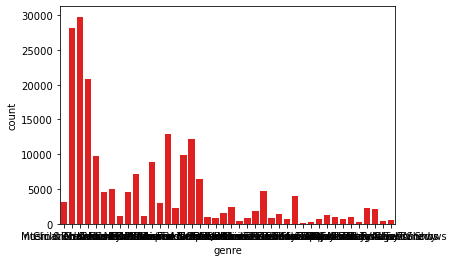

In [45]:
sns.countplot(x=df_fin['genre'][::-1],color='r')

<Figure size 1080x720 with 0 Axes>

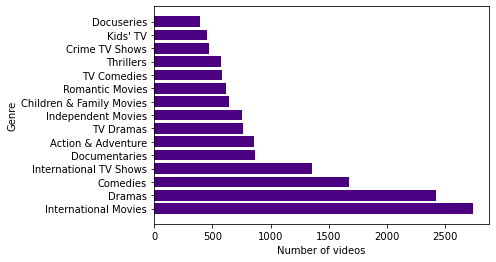

<Figure size 1080x720 with 0 Axes>

In [46]:
plt.barh(d['genre'][:15],d['title'][:15],color='indigo')
plt.xlabel('Number of videos')
plt.ylabel('Genre')
plt.figure(figsize=(15,10))

## number of distinct titles on basis of type

/Users/jontyios/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

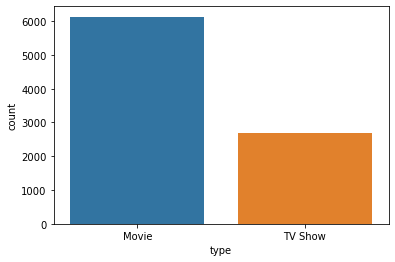

In [47]:
sns.countplot(df['type'])

In [48]:
d=df_fin.groupby(by='type').agg({'title':'nunique'}).reset_index()
d

,type,title
0,Movie,6115
1,TV Show,2676


([<matplotlib.patches.Wedge at 0x7fa2e29a7370>,
 [Text(-0.6341947433438904, 0.898775293115569, 'Movie'),
  Text(0.6341947433438908, -0.8987752931155689, 'TV Show')],
 [Text(-0.34592440546030384, 0.4902410689721285, '69.6%'),
  Text(0.345924405460304, -0.49024106897212844, '30.4%')])

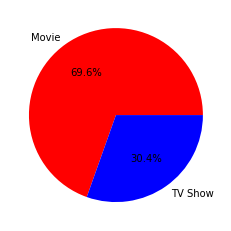

In [49]:
plt.pie(d['title'],labels=d['type'],colors=['red','blue'],autopct='%.1f%%')

## number of movies released per country

In [50]:
d=df_fin.groupby(by='country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,country,title
119,United States,4245
47,India,1126
117,United Kingdom,829
22,Canada,460
38,France,409
55,Japan,338
105,Spain,239
103,South Korea,235
40,Germany,231
121,Unknown Country,175


## we can see some countries have ',' after their name so we need to remove it 

In [51]:
df_fin['country']=df_fin['country'].str.replace(',','')

In [52]:
d=df_fin.groupby(by='country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,country,title
116,United States,4246
46,India,1126
115,United Kingdom,831
21,Canada,460
37,France,409
54,Japan,338
103,Spain,239
101,South Korea,235
39,Germany,231
68,Mexico,175


Text(0, 0.5, 'Country')

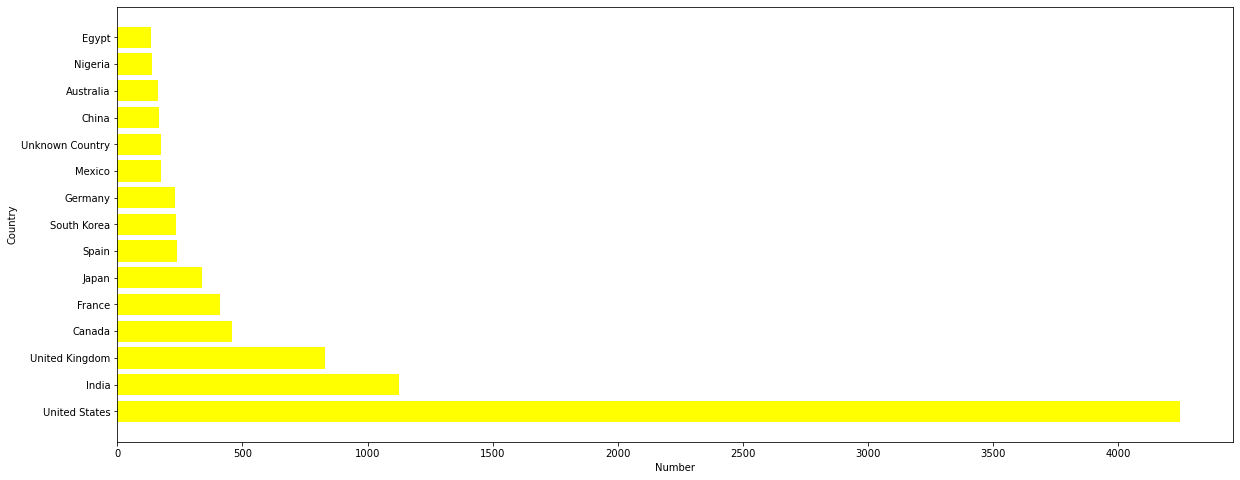

In [53]:
plt.figure(figsize=(20,8))
plt.barh(d['country'][:15],d['title'][:15],color='yellow')
plt.xlabel('Number')
plt.ylabel('Country')

## number of distinct titles on the basis of ratings

In [54]:
d=df_fin.groupby(by='rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,rating,title
8,TV-MA,3204
6,TV-14,2151
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,305
3,PG,287
7,TV-G,220
2,NR,87


Text(0, 0.5, 'Ratings')

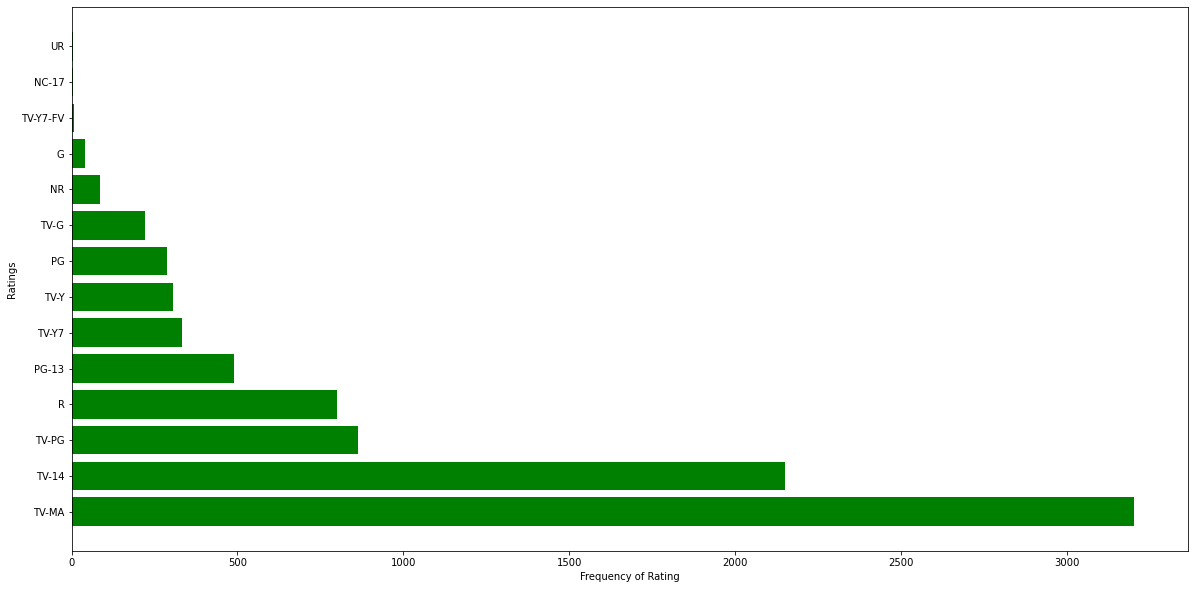

In [55]:
plt.figure(figsize=(20,10))
plt.barh(d['rating'],d['title'],color='green')
plt.xlabel('Frequency of Rating')
plt.ylabel('Ratings')

## actors with most number of movies

In [56]:
d=df_fin.groupby(by='cast').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[:50]
d=d[d['cast']!='Unknown Actor']
d

,cast,title
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
846,Akshay Kumar,30
35881,Yuki Kaji,29
1774,Amitabh Bachchan,28


<BarContainer object of 49 artists>

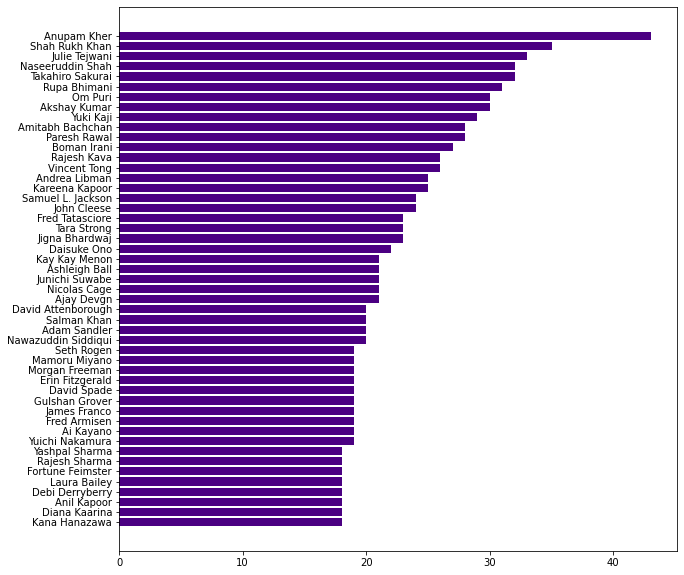

In [57]:
plt.figure(figsize=(10,10))
plt.barh(d['cast'][::-1],d['title'][::-1],color='indigo')

## number of movies done by each director

In [58]:
d=df_fin.groupby(by='director').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)[:20]
d=d[d['director']!='Unknown Director']
d

,director,title
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
4942,Youssef Chahine,12
2945,Martin Scorsese,12
1951,Jay Chapman,12


Text(0, 0.5, 'Directors')

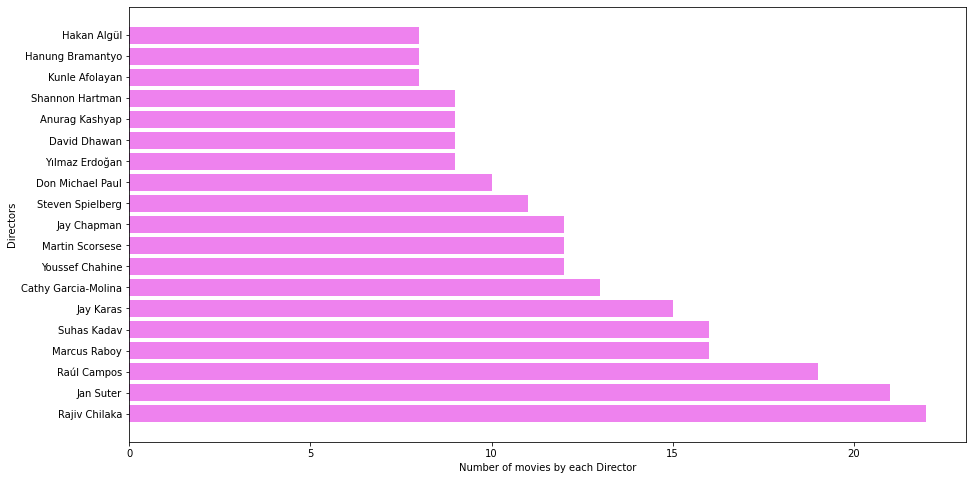

In [59]:
plt.figure(figsize=(15,8))
plt.barh(d['director'],d['title'],color='violet')
plt.xlabel('Number of movies by each Director')
plt.ylabel('Directors')

## number of movies or shows released per year

In [60]:
d=df_fin.groupby(by='year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,year,title
11,2019,2012
12,2020,1877
10,2018,1650
13,2021,1498
9,2017,1185
8,2016,432
7,2015,82
6,2014,24
3,2011,13
5,2013,11


/Users/jontyios/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of movies')

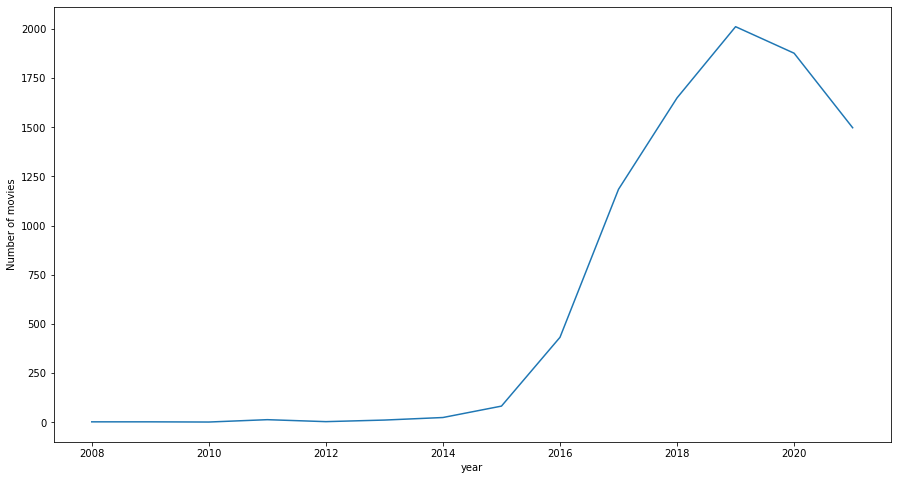

In [61]:
plt.figure(figsize=(15,8))
sns.lineplot(d['year'],d['title'])
plt.ylabel('Number of movies')

## ploting the release date and number of movies

In [62]:
d=df_fin.groupby(by='release_year').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,release_year,title
70,2018,1146
69,2017,1030
71,2019,1023
72,2020,953
68,2016,902
73,2021,589
67,2015,557
66,2014,352
65,2013,288
64,2012,237


/Users/jontyios/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year', ylabel='title'>

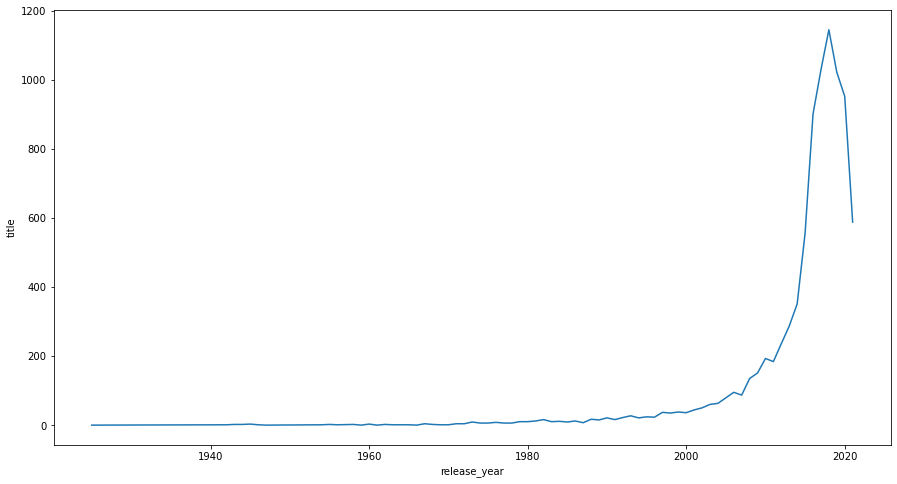

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(d['release_year'],d['title'])

#### Analysis seperately now for the movies and TV shows

In [64]:
df_shows=df_fin[df_fin['type']=="TV Show"]
df_movies=df_fin[df_fin['type']=="Movie"]

In [65]:
df_shows.head(10)

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
1,Blood & Water,Ama Qamata,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
2,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
3,Blood & Water,Ama Qamata,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
4,Blood & Water,Khosi Ngema,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
5,Blood & Water,Khosi Ngema,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
6,Blood & Water,Khosi Ngema,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
7,Blood & Water,Gail Mabalane,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
8,Blood & Water,Gail Mabalane,Unknown Director,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
9,Blood & Water,Gail Mabalane,Unknown Director,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021
10,Blood & Water,Thabang Molaba,Unknown Director,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0,24,9,2021


In [66]:
df_movies.head(10)

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,25,9,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
163,My Little Pony: A New Generation,James Marsden,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
164,My Little Pony: A New Generation,James Marsden,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
165,My Little Pony: A New Generation,Sofia Carson,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
166,My Little Pony: A New Generation,Sofia Carson,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
167,My Little Pony: A New Generation,Liza Koshy,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021


In [74]:
d=df_shows.groupby(by='genre').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=True)
d

,genre,title
19,TV Shows,16
2,Classic & Cult TV,28
12,Stand-Up Comedy & Talk Shows,56
20,TV Thrillers,57
21,Teen TV Shows,69
16,TV Horror,75
18,TV Sci-Fi & Fantasy,84
10,Science & Nature TV,92
17,TV Mysteries,98
7,Korean TV Shows,151


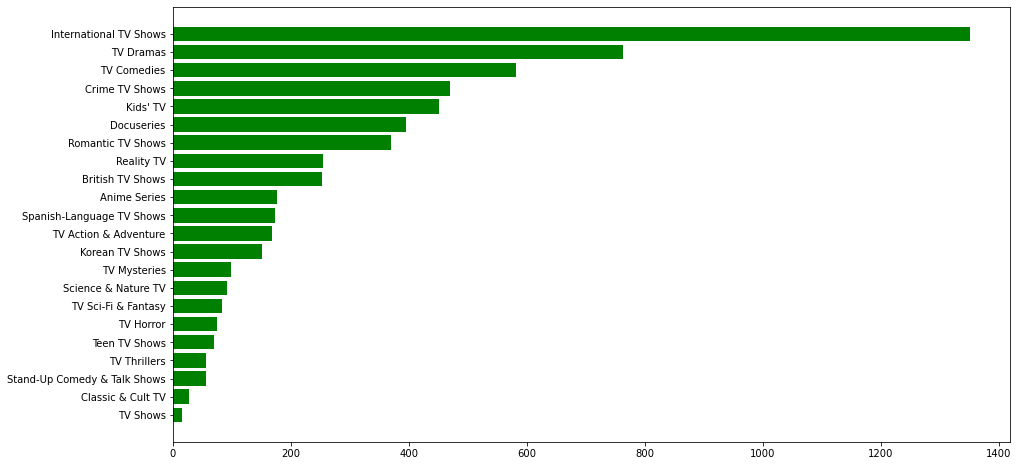

In [75]:
plt.figure(figsize=(15,8))
plt.barh(d['genre'],d['title'],color='green')
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

In [76]:
d=df_movies.groupby(by='genre').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,genre,title
11,International Movies,2738
7,Dramas,2418
4,Comedies,1673
6,Documentaries,869
0,Action & Adventure,854
10,Independent Movies,756
2,Children & Family Movies,639
15,Romantic Movies,615
19,Thrillers,573
14,Music & Musicals,372


<BarContainer object of 20 artists>

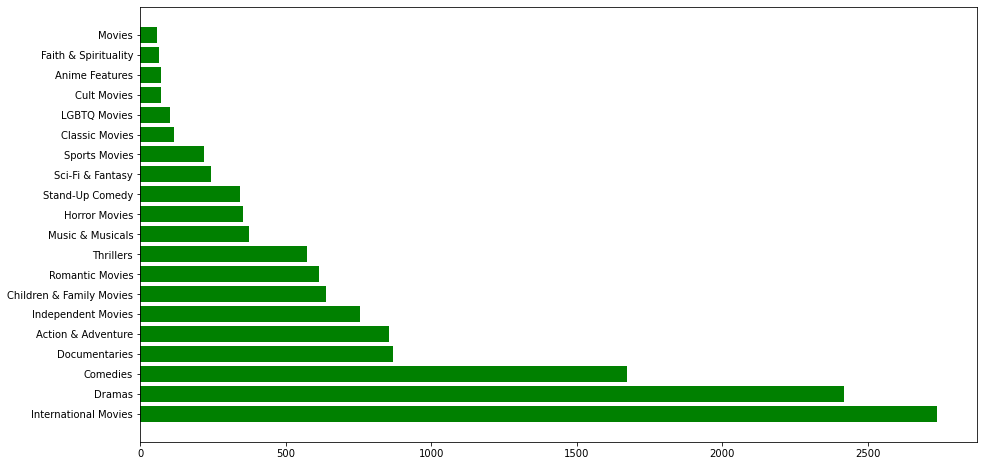

In [79]:
plt.figure(figsize=(15,8))
plt.barh(d['genre'],d['title'],color='green')

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies

In [80]:
d=df_shows.groupby(by='country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,country,title
64,United States,1308
63,United Kingdom,273
31,Japan,200
53,South Korea,171
9,Canada,126
20,France,91
26,India,86
58,Taiwan,72
3,Australia,66
54,Spain,63


In [82]:
d=df_movies.groupby(by='country').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
d

,country,title
112,United States,2938
43,India,1040
111,United Kingdom,558
19,Canada,334
34,France,318
36,Germany,187
99,Spain,176
113,Unknown Country,156
51,Japan,138
75,Nigeria,129


It seems United States has the largest contribution in both movies as well as TV Shows

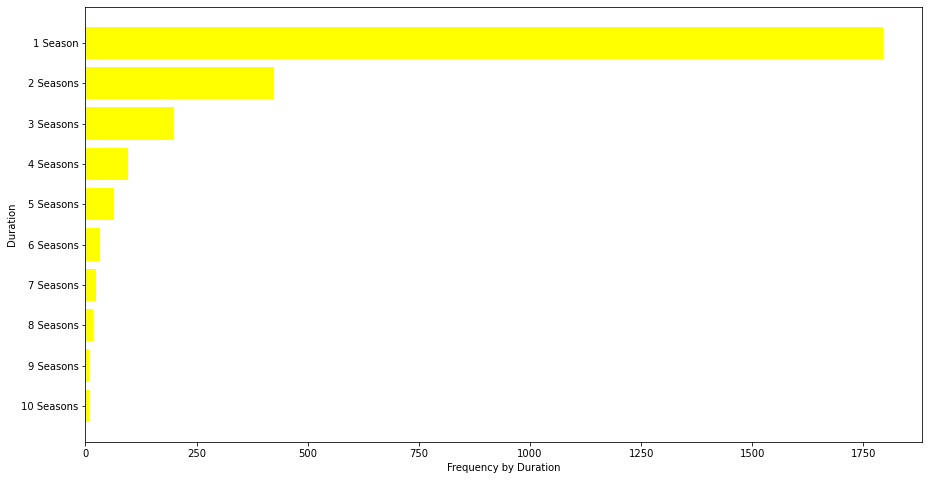

In [83]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color='yellow')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

It shows most of the TV Shows have only 1 season 

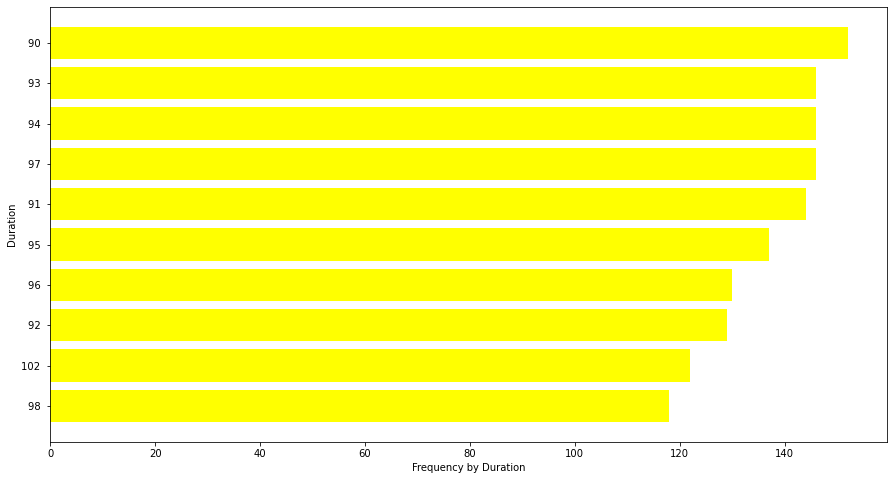

In [84]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color='yellow')
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

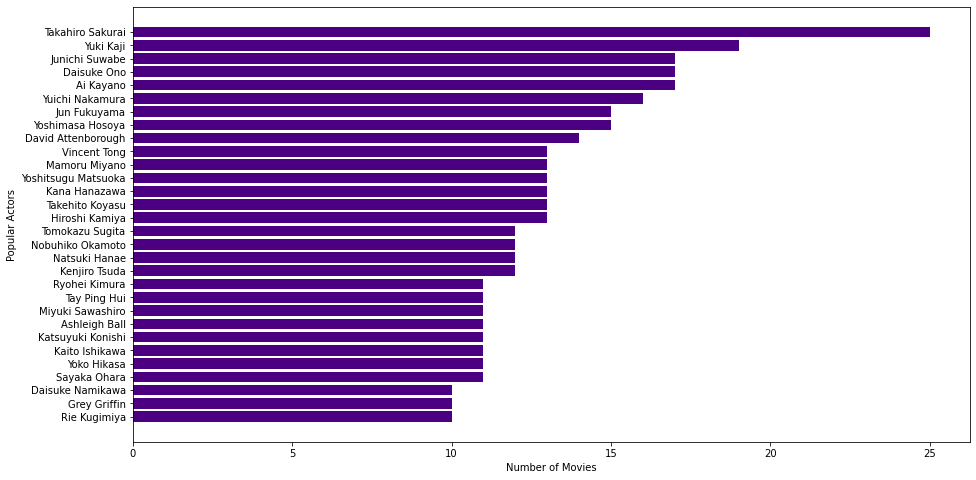

In [86]:
df_actors=df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Takahiro Sakurai,Yuki Kaji and other South Korean/Japanese actors are the most popular actors across TV Shows

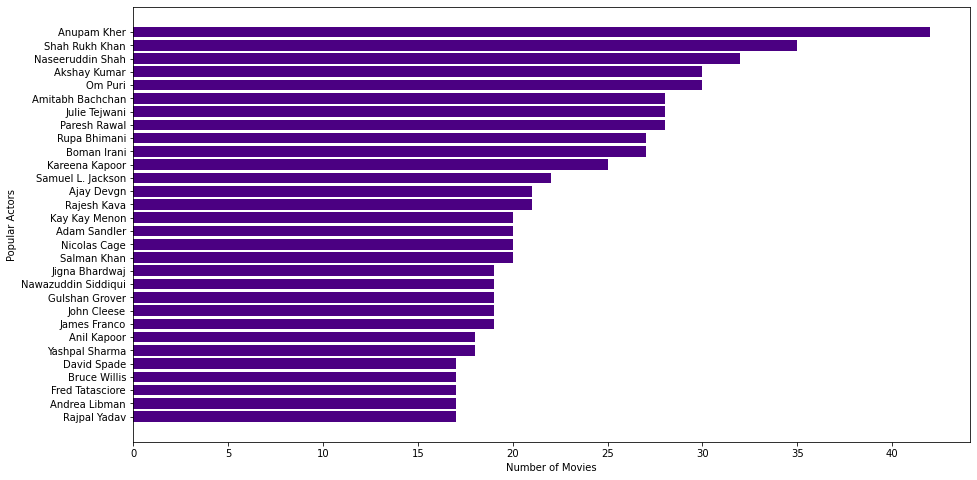

In [87]:
df_actors=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

## Questions to be Explored Now for Recommendations

1) So this time, the granularity level is country  and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3)In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4)Who are the popular actors/directors across TV Shows and Movies in these countries?

5)In what time of the year, people tend to watch movies and shows in these countries?

6)Popular Actor and Director Combinations in these countries

### USA will be analysed for TV Shows and Movies

### India analysed only for movies

In [98]:
df_usa_shows=df_fin[df_fin['country']=='United States'][df_fin[df_fin['country']=='United States']['type']=='TV Show']
df_usa_movies=df_fin[df_fin['country']=='United States'][df_fin[df_fin['country']=='United States']['type']=='Movie']

In [99]:
df_usa_movies.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",90,25,9,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,United States,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,91,24,9,2021


In [100]:
df_usa_shows.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
85,Jailbirds New Orleans,Unknown Actor,Unknown Director,United States,Docuseries,s4,TV Show,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",0,24,9,2021
86,Jailbirds New Orleans,Unknown Actor,Unknown Director,United States,Reality TV,s4,TV Show,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",0,24,9,2021
111,Midnight Mass,Kate Siegel,Mike Flanagan,United States,TV Dramas,s6,TV Show,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,0,24,9,2021
112,Midnight Mass,Kate Siegel,Mike Flanagan,United States,TV Horror,s6,TV Show,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,0,24,9,2021
113,Midnight Mass,Kate Siegel,Mike Flanagan,United States,TV Mysteries,s6,TV Show,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,0,24,9,2021


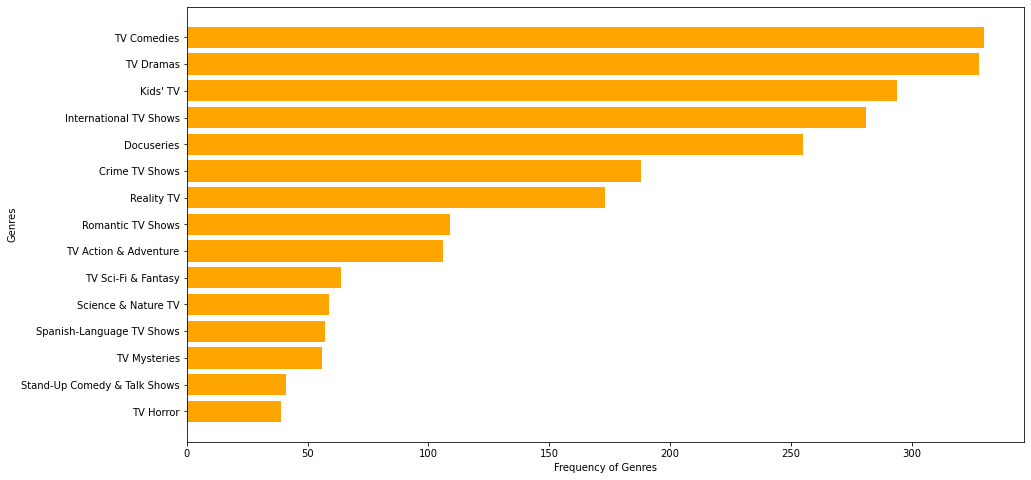

In [102]:
df_genre=df_usa_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

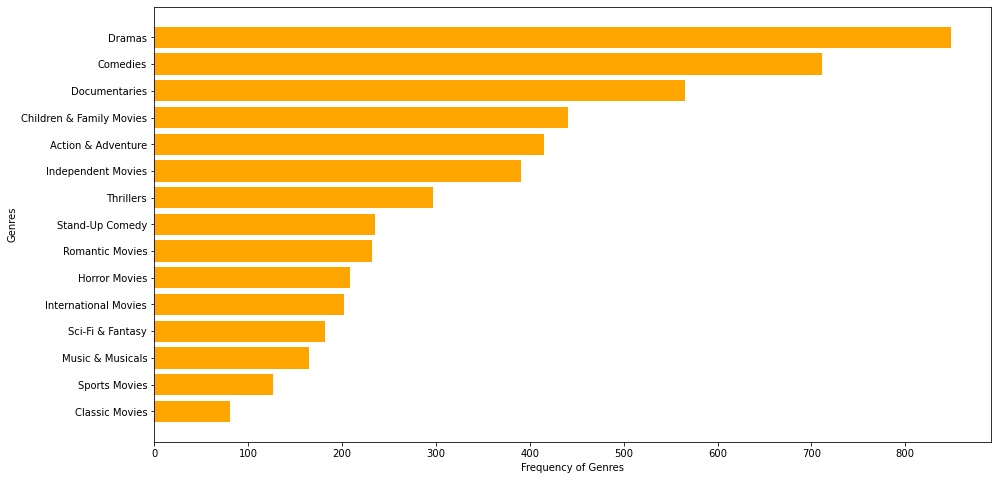

In [103]:
df_genre=df_usa_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

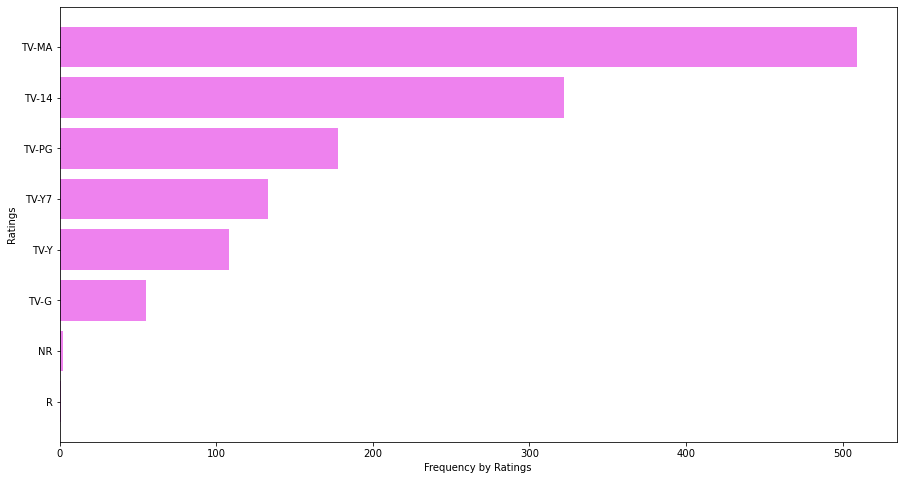

In [104]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

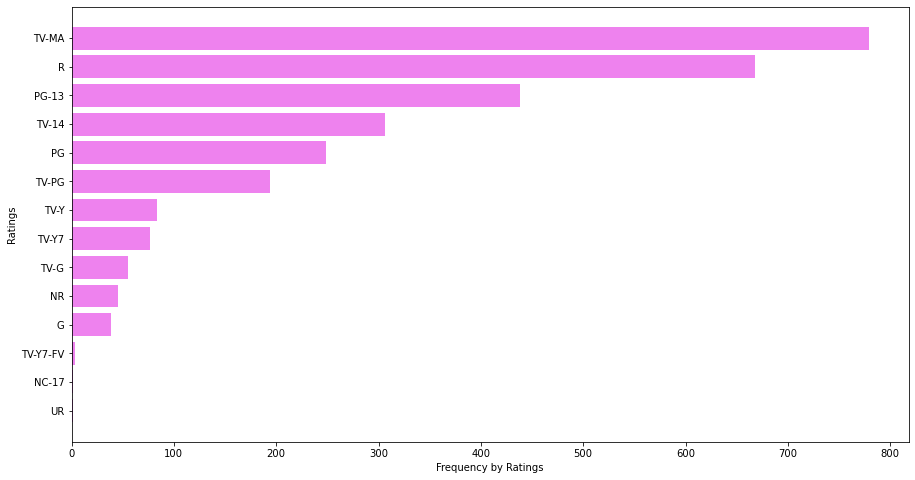

In [105]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

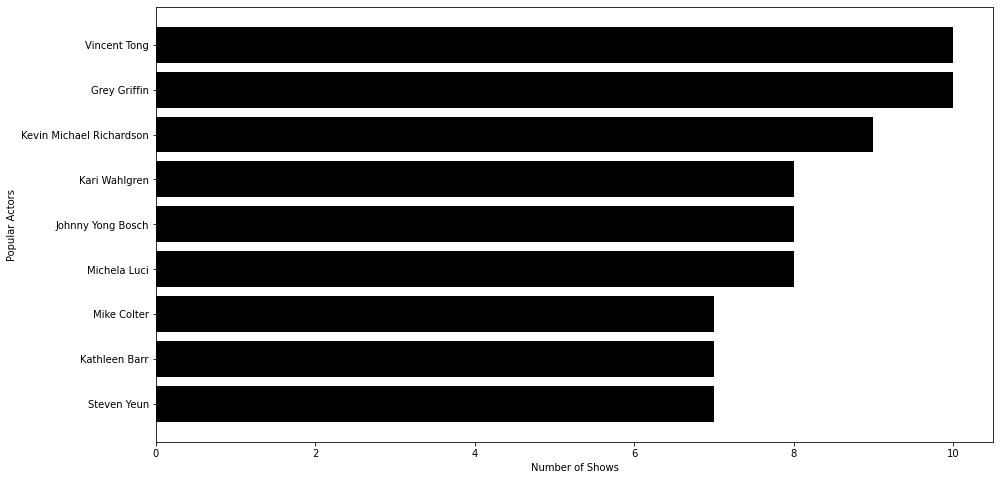

In [107]:
df_actors=df_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['black'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

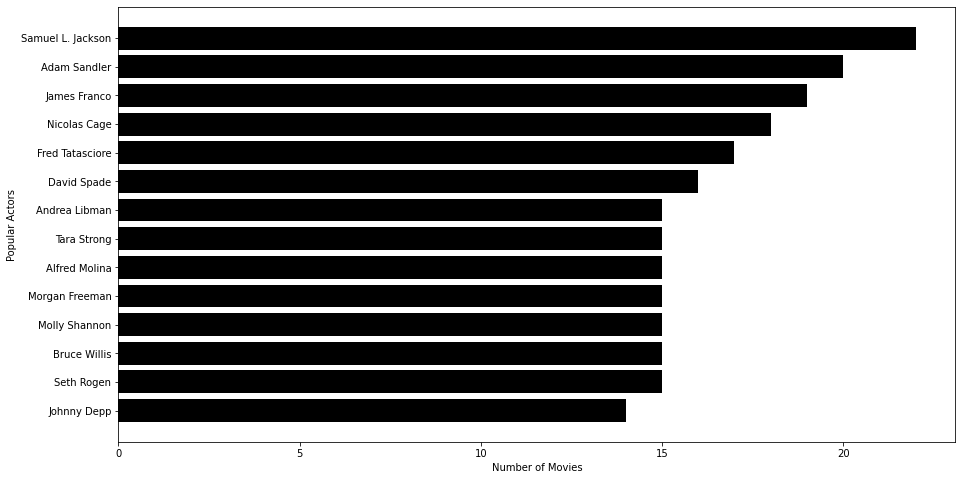

In [108]:
df_actors=df_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['black'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

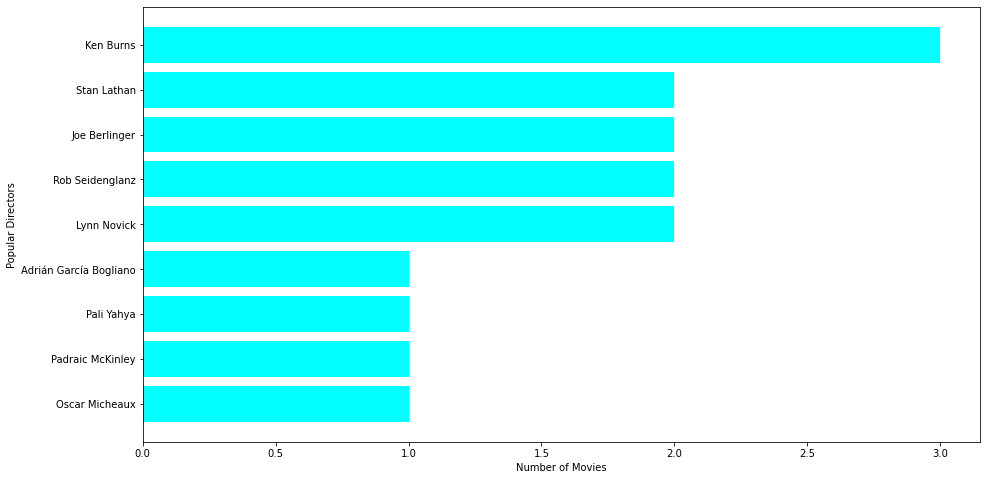

In [113]:
df_directors=df_usa_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color='cyan')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

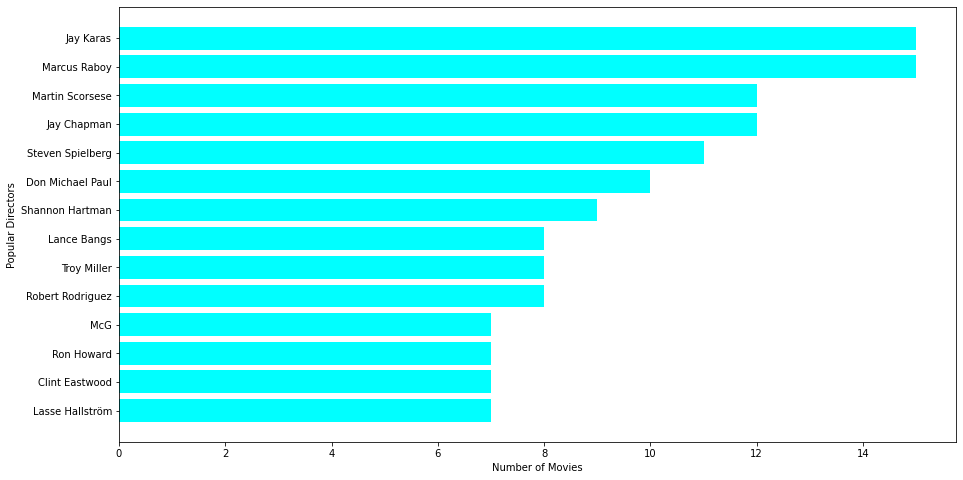

In [114]:
df_directors=df_usa_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['cyan'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

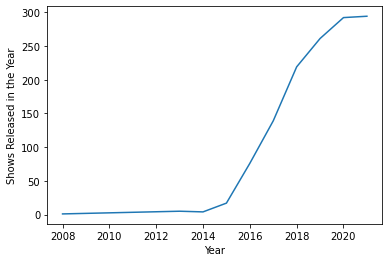

In [115]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

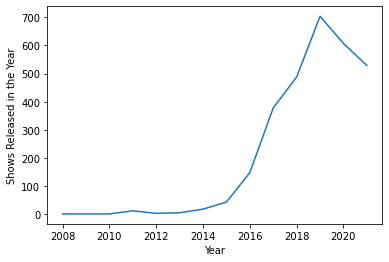

In [116]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

We can see there is a dip in number of movies after 2020 may be due to covid

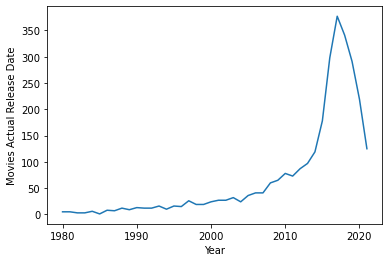

In [117]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

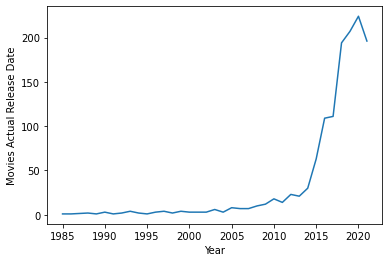

In [118]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

### Analysing data for Indian movies

In [120]:
df_india_movies=df_fin[df_fin['country']=='India'][df_fin[df_fin['country']=='India']['type']=='Movie']

In [121]:
df_india_movies.head(10)

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year
621,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
622,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
629,Avvai Shanmughi,Nassar,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
630,Avvai Shanmughi,Nassar,K.S. Ravikumar,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
631,Avvai Shanmughi,S.P. Balasubrahmanyam,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
632,Avvai Shanmughi,S.P. Balasubrahmanyam,K.S. Ravikumar,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021
641,Jeans,Prashanth,S. Shankar,India,Comedies,s25,Movie,2021-09-21,1998,TV-14,166,When the father of the man she loves insists t...,166,21,9,2021
642,Jeans,Prashanth,S. Shankar,India,International Movies,s25,Movie,2021-09-21,1998,TV-14,166,When the father of the man she loves insists t...,166,21,9,2021
643,Jeans,Prashanth,S. Shankar,India,Romantic Movies,s25,Movie,2021-09-21,1998,TV-14,166,When the father of the man she loves insists t...,166,21,9,2021
644,Jeans,Aishwarya Rai Bachchan,S. Shankar,India,Comedies,s25,Movie,2021-09-21,1998,TV-14,166,When the father of the man she loves insists t...,166,21,9,2021


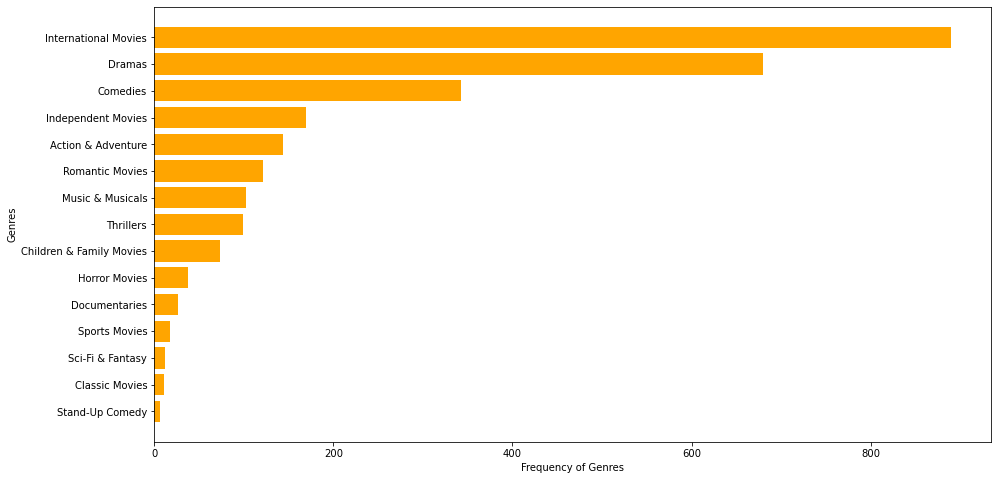

In [123]:
df_genre=df_india_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

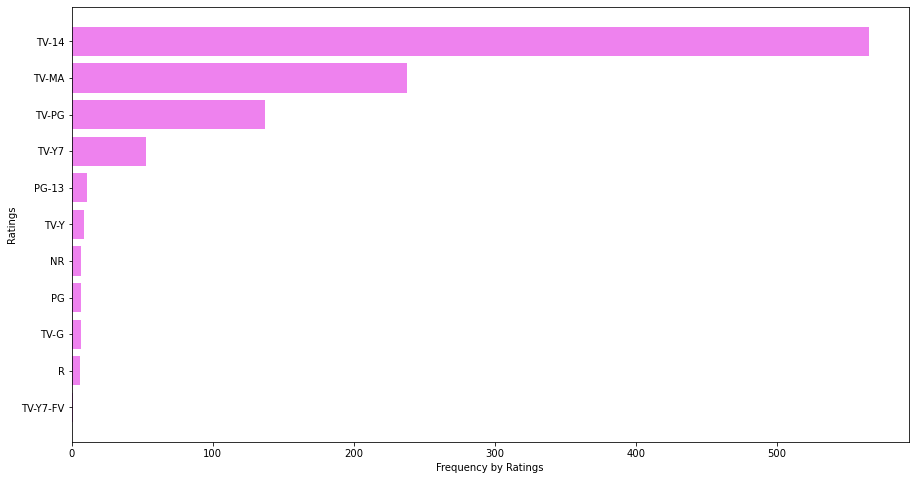

In [124]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color='violet')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

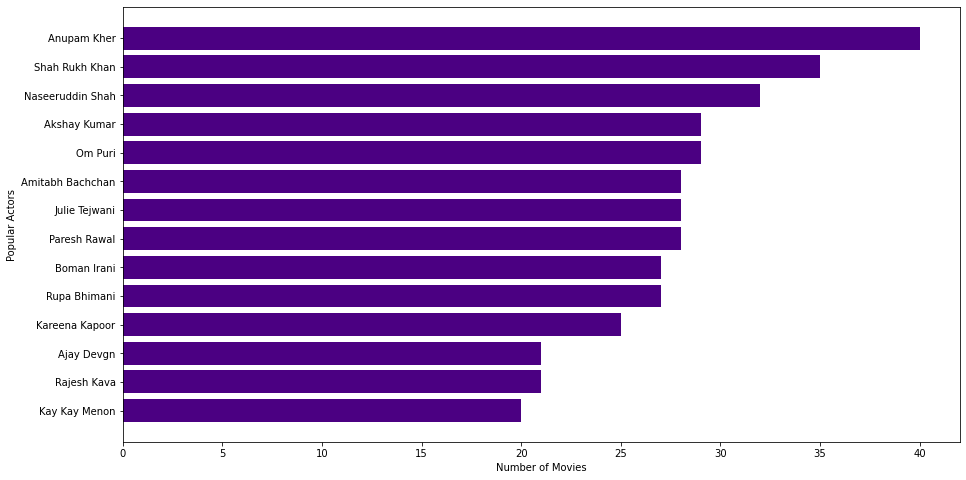

In [125]:
df_actors=df_india_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Anupam Kher, SRK, Naseerudddin Shah are among the popular actors

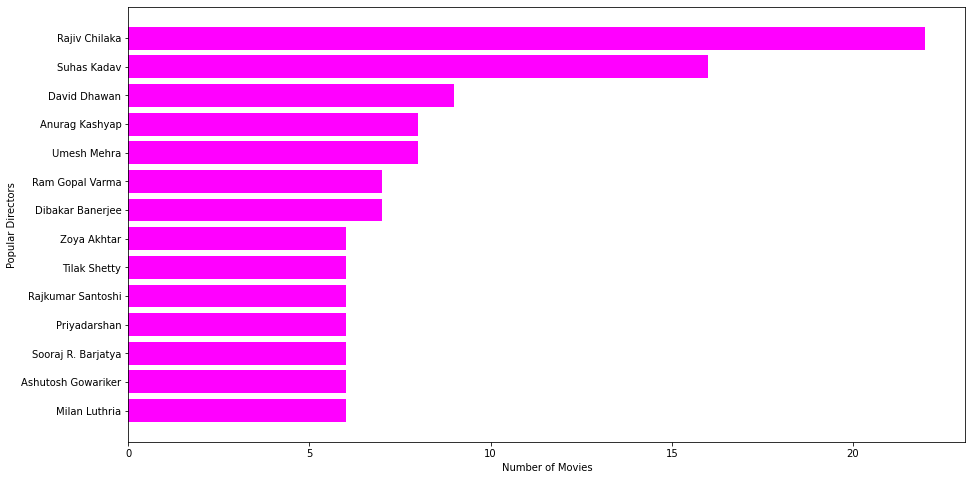

In [126]:
df_directors=df_india_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['magenta'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

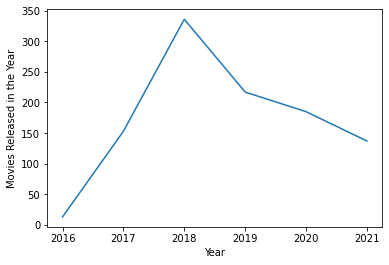

In [127]:
df_year=df_india_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

After covid struck it appears that Indian movies also took a hit

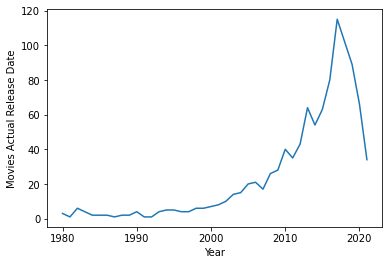

In [128]:
df_release_year=df_india_movies[df_india_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In [130]:
#Analysing a combination of actors and directors
df_india_movies['Actor_Director_Combination'] = df_india_movies.cast.str.cat(df_india_movies.director, sep=' and ')
df_india_movies_subset=df_india_movies[df_india_movies['cast']!='Unknown Actor']
df_india_movies_subset=df_india_movies_subset[df_india_movies_subset['director']!='Unknown Director']
df_india_movies_subset.head()

,title,cast,director,country,genre,show_id,type,date_added,release_year,rating,duration,description,duration_copy,day,month,year,Actor_Director_Combination
621,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021,Kamal Hassan and K.S. Ravikumar
622,Avvai Shanmughi,Kamal Hassan,K.S. Ravikumar,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021,Kamal Hassan and K.S. Ravikumar
629,Avvai Shanmughi,Nassar,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021,Nassar and K.S. Ravikumar
630,Avvai Shanmughi,Nassar,K.S. Ravikumar,India,International Movies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021,Nassar and K.S. Ravikumar
631,Avvai Shanmughi,S.P. Balasubrahmanyam,K.S. Ravikumar,India,Comedies,s23,Movie,2021-09-21,1996,TV-PG,161,Newly divorced and denied visitation rights wi...,161,21,9,2021,S.P. Balasubrahmanyam and K.S. Ravikumar


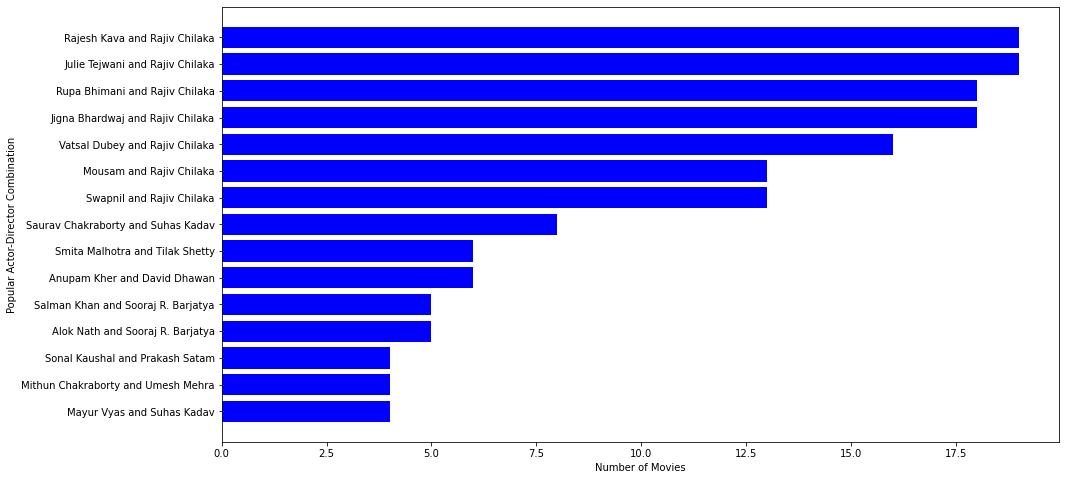

In [131]:
df_actors_directors=df_india_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color='blue')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

# Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are 
Drama, Comedy and International TV Shows/Movies, so content aligning to that 
is recommended.

2) The target audience in USA and India is recommended to be 14+ and above ratings 

3) Add movies for Indian Audience, it has been declining since 2018.

